### Main Challenge:

You must create a Python App (Data Pipeline) that allow their potential users to find the nearest BiciMAD station to a set of places of interest using the methods included in the module geo_calculations.py.

### Instalaciones accesibles no municipales

Recopila información de todas aquellas instalaciones accesibles no municipales de la ciudad de las que posee conocimiento expreso el Ayuntamiento de Madrid y que están publicadas en el portal institucional madrid.es. 

Incluye, entre otras, información sobre:

-          Ministerios

-          Oficinas de correos

-          Centros de enseñanza y universidades

-          Centros de día y residenciales

-          Museos

-          Espacios de ocio

 

En la información de cada espacio, incluye información (si está disponible) sobre:

- el horario
- los equipamientos de que dispone y/o los servicios que presta
- su dirección completa (incluyendo calle,  distrito, barrio, código postal y coordenadas geográficas)
- los medios de transporte más cercanos disponibles (Bus, metro, Bicimad y Renfe)
- teléfono
- el correo electrónico
- la dirección web donde está publicada en madrid.es para su consulta en un formato más amigable.

**[Enlace](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=f31050abd15b3410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**

Los métodos incluidos en el módulo geo_calculations.py **mencionados anteriormente** son copiados-pegados textualmente a continuación:

In [1]:
# conda install -c conda-forge geopandas 
# (shapely is a geopandas dependance)

from shapely.geometry import Point # https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html
import geopandas as gpd # https://geopandas.org/en/stable/getting_started.html

# Methods

def to_mercator(lat, long):
    # transform latitude/longitude data in degrees to pseudo-mercator coordinates in metres
    c = gpd.GeoSeries([Point(lat, long)], crs=4326)
    c = c.to_crs(3857)
    return c

def distance_meters(lat_start, long_start, lat_finish, long_finish):
    # return the distance in metres between to latitude/longitude pair points in degrees 
    # (e.g.: Start Point -> 40.4400607 / -3.6425358 End Point -> 40.4234825 / -3.6292625)
    start = to_mercator(lat_start, long_start)
    finish = to_mercator(lat_finish, long_finish)
    return start.distance(finish)

Sin embargo, tuve problemas para instalar Geopandas. Así que tuve que hacerlo desde el Notebook con las siguientes líneas de comandos:

- `%pip install geopandas`
- `%pip install shapely`

Esta es la [documentación](https://geopandas.org/en/stable/docs/reference/geoseries.html) de **Geoseries** en Pandas.

Por supuesto, importamos las siguientes **librerías:**

In [2]:
import pandas as pd
import numpy as np

#### Lo que generamos de los notebooks anteriores, importamos las versiones de los siguientes .cvs:

- bicimad_df
- biciparks_df
- inst_no_munic_df

#### BiciMAD:

In [3]:
bicimad_df = pd.read_csv('./data/bicimad_stations.csv')
bicimad_df = bicimad_df.rename(columns={"mad_long": "BiciMAD Long.",
                                        "mad_lat" : "BiciMAD Lat."})
bicimad_df = bicimad_df.drop(columns='Unnamed: 0')
bicimad_df

,BiciMAD station,BiciMAD address,BiciMAD Long.,BiciMAD Lat.
0,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214
1,1b - Puerta del Sol B,Puerta del Sol nº 1,-3.701603,40.417313
2,2 - Miguel Moya,Calle Miguel Moya nº 1,-3.705842,40.420589
3,3 - Plaza Conde Suchil,Plaza del Conde del Valle de Súchil nº 3,-3.706917,40.430294
4,4 - Malasaña,Calle Manuela Malasaña nº 5,-3.702587,40.428552
...,...,...,...,...
259,257 - INEF,Avenida Juan de Herrera frente a la calle Paul...,-3.729970,40.438960
260,258 - Ciudad Universitaria 1,Avenida de la Complutense (Metro Ciudad Univer...,-3.726990,40.443750
261,259 - Ciudad Universitaria 2,Avenida de la Complutense (Metro Ciudad Univer...,-3.726930,40.443420
262,260 - Facultad Biología,Calle José Antonio Novais frente al nº 12,-3.727295,40.448332


#### Biciparks:

In [4]:
biciparks_df = pd.read_csv('./data/biciparks_df_v2.csv')
biciparks_df = biciparks_df.rename(columns={"park_long": "BiciPARK Long.",
                                            "park_lat" : "BiciPARK Lat."})
biciparks_df = biciparks_df.drop(columns=['Unnamed: 0','zip_code'])
biciparks_df

,BiciPARK station,BiciPARK address,BiciPARK Long.,BiciPARK Lat.
0,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684
1,Bicipark Orense,"Avenida General Perón, 27",-3.693897,40.452973
2,Bicipark Montalban,"Calle de Montalbán, 5",-3.690786,40.418146
3,Bicipark Almagro,"Calle Almagro, 11",-3.692879,40.430361
4,Bicipark Recoletos,"Paseo de Recoletos, 2",-3.692245,40.420354
5,Bicipark Recuerdo,"Calle Hiedra, 26",-3.678921,40.472419
6,Bicipark Salamanca,Pl. del Marqués de Salamanca,-3.679172,40.430315
7,Bicipark Villa de Paris,"Calle de Orellana, 23, 21",-3.693698,40.425608
8,Bicipark Pitis,"Calle Pau Arroyo del Fresno, 181",-3.724914,40.495942
9,Bicipark Aviación,Parking Aviación Española,-3.783695,40.383492


#### Instalaciones Accesibles NO municipales:

In [5]:
inst_no_munic_df = pd.read_csv('./data/inst_no_munic_df_v2.csv')
inst_no_munic_df = inst_no_munic_df.drop(columns='Unnamed: 0')
inst_no_munic_df = inst_no_munic_df.drop(columns='Postal code')
inst_no_munic_df = inst_no_munic_df.rename(columns={"place_lat": "Place LAT.",
                                            "place_long" : "Place LONG."})
inst_no_munic_df

,Place of interest,Place address,Place LAT.,Place LONG.
0,Sede QuedaT.com Chamartín,Pasaje Doña Carlota 13,40.447907,-3.663171
1,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,40.468046,-3.663242
2,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,40.562993,-3.714052
3,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,40.394474,-3.656134
4,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,40.454894,-3.672454
...,...,...,...,...
403,Tanatorio Sur de Madrid,Calle Ildefonso Gonzalez Valencia 1,40.373252,-3.721590
404,Teatro Municipal de Títeres. Parque de El Retiro,Avenida México 4 Parque De El Retiro. Entrada ...,40.418784,-3.686652
405,Teatros del Canal,Calle Cea Bermudez 1,40.438548,-3.705057
406,WiZink Center,Calle Jorge Juan 99,40.423273,-3.672101


El output debe lucir algo ["así"](https://github.com/ih-datapt-mad/ih_datamadpt0923_project_m1)

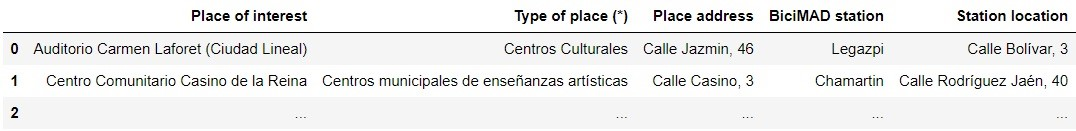

In [6]:
from IPython.display import Image, display
image_path = 'Output_sample.jpg'
display(Image(filename=image_path))

Vamos a usar la función para **calcular distancias** entre coordenadas:

In [7]:
def distance_meters(lat_start, long_start, lat_finish, long_finish):
    # return the distance in metres between to latitude/longitude pair points in degrees 
    # (e.g.: Start Point -> 40.4400607 / -3.6425358 End Point -> 40.4234825 / -3.6292625)
    start = to_mercator(lat_start, long_start)
    finish = to_mercator(lat_finish, long_finish)
    return start.distance(finish)

Haremos una primera prueba desde **BiciMAD** 1a - Puerta del Sol A, calculando su distancia hasta **Sede QuedaT.com Chamartín**

In [8]:
bicimad_df.head(1)

,BiciMAD station,BiciMAD address,BiciMAD Long.,BiciMAD Lat.
0,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214


In [9]:
inst_no_munic_df.head(1)

,Place of interest,Place address,Place LAT.,Place LONG.
0,Sede QuedaT.com Chamartín,Pasaje Doña Carlota 13,40.447907,-3.663171


In [10]:
# distance_meters(lat_start, long_start, lat_finish, long_finish)

# El punto inicial es Puerta del Sol (lat_start, long_start) y el destino es Chamartín (lat_finish, long_finish)

distance_meters(40.417214,-3.701834, 40.447907,-3.663171)

0    5502.246488
dtype: float64

La primera prueba nos dice que hay una distancia de 5502 mts (5.5 kms) **desde** Bicimad de Puerta del Sol **hasta** Sede QuedaT.com Chamartín.

### Combinando Dataframes con [Pandas Cross-join](https://linuxhint.com/pandas-cross-join/)

#### 1. Entre BiciMAD y los Sitios de interés

In [11]:
# Creamos una columna 'key' en bicimad_df y en inst_no_munic_df para tener una llave en común 
bicimad_df['key'] = 0
inst_no_munic_df['key'] = 0

# Creamos un nuevo df bicimad_project_df, haciendo el merge de bicimad con el de los sitios de interés
bicimad_project_df = bicimad_df.merge(inst_no_munic_df, on='key', how='outer')
bicimad_project_df.head()

,BiciMAD station,BiciMAD address,BiciMAD Long.,BiciMAD Lat.,key,Place of interest,Place address,Place LAT.,Place LONG.
0,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214,0,Sede QuedaT.com Chamartín,Pasaje Doña Carlota 13,40.447907,-3.663171
1,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214,0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,40.468046,-3.663242
2,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214,0,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,40.562993,-3.714052
3,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214,0,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,40.394474,-3.656134
4,1a - Puerta del Sol A,Puerta del Sol nº 1,-3.701834,40.417214,0,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,40.454894,-3.672454


In [12]:
# Combinando cada fila de las estaciones bicimad con cada una de los sitios de interés, obtenemos 107712 filas
len(bicimad_project_df)

107712

#### 2. Entre Biciparks y los Sitios de interés

In [13]:
# Creamos una columna 'key' en biciparks_df y en inst_no_munic_df para tener una llave en común 
biciparks_df['key'] = 0

# Creamos un nuevo df parks_project_df, haciendo el merge de biciparks con el de los sitios de interés
parks_project_df = biciparks_df.merge(inst_no_munic_df, on='key', how='outer')
parks_project_df.head()

,BiciPARK station,BiciPARK address,BiciPARK Long.,BiciPARK Lat.,key,Place of interest,Place address,Place LAT.,Place LONG.
0,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684,0,Sede QuedaT.com Chamartín,Pasaje Doña Carlota 13,40.447907,-3.663171
1,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684,0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,40.468046,-3.663242
2,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684,0,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,40.562993,-3.714052
3,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684,0,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,40.394474,-3.656134
4,Bicipark Fuente de la Mora,Estación de Fuente de la Mora,-3.663068,40.484684,0,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,40.454894,-3.672454


In [14]:
# Combinando cada fila de las estaciones biciparks con cada una de los sitios de interés, obtenemos 4080 filas
len(parks_project_df)

4080

### Calculando distancias entre coordenadas con def distance_meters

#### 1. Distancia en metros desde BiciMAD de destino hasta cada Sitio de interés

In [15]:
# distance_meters(lat_start, long_start, lat_finish, long_finish)
bicimad_project_df['Distance from station in mts'] = round(bicimad_project_df.apply(lambda row: distance_meters(row['BiciMAD Lat.'], row['BiciMAD Long.'], row['Place LAT.'], row['Place LONG.']), axis=1), 2)

# Ordenando de menor a mayor distancia
bicimad_project_df = bicimad_project_df.sort_values(by='Distance from station in mts')

(La función se tomó **10 minutos** en calcular las distancias de todas las filas)

In [16]:
# Cambiando el orden de las columnas
column_order = ['Place of interest','Place address','BiciMAD station', 'BiciMAD address','Distance from station in mts']
bicimad_project_df = bicimad_project_df[column_order]
bicimad_project_df = bicimad_project_df.sort_values(by='Distance from station in mts')
bicimad_project_df

,Place of interest,Place address,BiciMAD station,BiciMAD address,Distance from station in mts
18391,Biblioteca Pública Pedro Salinas (Centro),Glorieta Puerta De Toledo 1,45 - Puerta de Toledo,Glorieta de la Puerta de Toledo nº 1,6.75
2566,Colegio Oficial de Arquitectos de Madrid (COAM),Calle Hortaleza 63,6 - Colegio Arquitectos,Calle Hortaleza nº 63,8.89
53408,Residencia Universitaria Augustinus Nebrija,Calle Cea Bermudez 59,128 - Cea Bermúdez,Calle Cea Bermúdez nº 59,12.55
26565,CaixaForum Madrid,Paseo Prado 36,67 - Almadén,Calle Almadén nº 28,23.87
37964,Biblioteca Nacional de España,Paseo Recoletos 20,94 - Biblioteca Nacional,Paseo de Recoletos nº 20,25.23
...,...,...,...,...,...
91356,Residencia para mayores Juan XXIII (Aravaca),Calle Procion 10,221 - Pavones,Calle Hacienda de Pavones nº 342,19922.79
90986,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,221 - Pavones,Calle Hacienda de Pavones nº 342,20157.02
91272,Oficina de Correos. Sucursal 32. Plaza Rogelio...,Plaza Rogelio Enriquez 5,221 - Pavones,Calle Hacienda de Pavones nº 342,20647.57
91336,Palacio Real de El Pardo,Calle Manuel Alonso 8,221 - Pavones,Calle Hacienda de Pavones nº 342,20702.45


In [17]:
bicimad_project_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107712 entries, 18391 to 91156
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Place of interest             107712 non-null  object 
 1   Place address                 107712 non-null  object 
 2   BiciMAD station               107712 non-null  object 
 3   BiciMAD address               107712 non-null  object 
 4   Distance from station in mts  107712 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.9+ MB


#### 2. Distancia en metros desde Biciparks de destino hasta cada Sitio de interés

In [18]:
parks_project_df['Distance from parking in mts'] = round(parks_project_df.apply(lambda row: distance_meters(row['BiciPARK Lat.'], row['BiciPARK Long.'], row['Place LAT.'], row['Place LONG.']), axis=1), 2)
parks_project_df.sort_values(by='Distance from parking in mts')

,BiciPARK station,BiciPARK address,BiciPARK Long.,BiciPARK Lat.,key,Place of interest,Place address,Place LAT.,Place LONG.,Distance from parking in mts
824,Bicipark Montalban,"Calle de Montalbán, 5",-3.690786,40.418146,0,Administración Montalbán. AEAT,Calle Montalban 6,40.417903,-3.690676,29.74
2899,Bicipark Villa de Paris,"Calle de Orellana, 23, 21",-3.693698,40.425608,0,Biblioteca del Tribunal Supremo,Plaza Villa De Paris 1,40.424744,-3.693302,105.83
1898,Bicipark Recoletos,"Paseo de Recoletos, 2",-3.692245,40.420354,0,Oficina de Correos. Oficina Principal. Paseo d...,Paseo Prado 1,40.418545,-3.692583,204.91
1082,Bicipark Montalban,"Calle de Montalbán, 5",-3.690786,40.418146,0,Oficina de Correos. Oficina Principal. Paseo d...,Paseo Prado 1,40.418545,-3.692583,205.33
2895,Bicipark Villa de Paris,"Calle de Orellana, 23, 21",-3.693698,40.425608,0,Biblioteca del Consejo General del Poder judicial,Calle Marques De La Ensenada 8,40.424136,-3.692518,210.18
...,...,...,...,...,...,...,...,...,...,...
3983,Bicipark Aviación,Parking Aviación Española,-3.783695,40.383492,0,Oficina de Correos. Sucursal 59. Calle Alanis,Calle Alanis 1,40.471358,-3.583066,24424.29
3749,Bicipark Aviación,Parking Aviación Española,-3.783695,40.383492,0,Centro de día y centro de rehabilitación Funda...,Plaza Hermanos Falco Y Alvarez De Toledo 1,40.473511,-3.578051,25032.79
3987,Bicipark Aviación,Parking Aviación Española,-3.783695,40.383492,0,Oficina de Correos. Sucursal 64. Aeropuerto T1...,Aeropuerto T1 T2 T3 Sala 1 (Llegadas),40.463855,-3.570391,25420.08
3683,Bicipark Aviación,Parking Aviación Española,-3.783695,40.383492,0,Aeropuerto Adolfo Suarez Madrid - Barajas,Avenida Hispanidad,40.468203,-3.569632,25673.22


In [19]:
# Cambiando el orden de las columnas
column_order = ['Place of interest','Place address','BiciPARK station', 'BiciPARK address','Distance from parking in mts']
parks_project_df = parks_project_df[column_order]
parks_project_df = parks_project_df.sort_values(by='Distance from parking in mts')
parks_project_df

,Place of interest,Place address,BiciPARK station,BiciPARK address,Distance from parking in mts
824,Administración Montalbán. AEAT,Calle Montalban 6,Bicipark Montalban,"Calle de Montalbán, 5",29.74
2899,Biblioteca del Tribunal Supremo,Plaza Villa De Paris 1,Bicipark Villa de Paris,"Calle de Orellana, 23, 21",105.83
1898,Oficina de Correos. Oficina Principal. Paseo d...,Paseo Prado 1,Bicipark Recoletos,"Paseo de Recoletos, 2",204.91
1082,Oficina de Correos. Oficina Principal. Paseo d...,Paseo Prado 1,Bicipark Montalban,"Calle de Montalbán, 5",205.33
2895,Biblioteca del Consejo General del Poder judicial,Calle Marques De La Ensenada 8,Bicipark Villa de Paris,"Calle de Orellana, 23, 21",210.18
...,...,...,...,...,...
3983,Oficina de Correos. Sucursal 59. Calle Alanis,Calle Alanis 1,Bicipark Aviación,Parking Aviación Española,24424.29
3749,Centro de día y centro de rehabilitación Funda...,Plaza Hermanos Falco Y Alvarez De Toledo 1,Bicipark Aviación,Parking Aviación Española,25032.79
3987,Oficina de Correos. Sucursal 64. Aeropuerto T1...,Aeropuerto T1 T2 T3 Sala 1 (Llegadas),Bicipark Aviación,Parking Aviación Española,25420.08
3683,Aeropuerto Adolfo Suarez Madrid - Barajas,Avenida Hispanidad,Bicipark Aviación,Parking Aviación Española,25673.22


In [20]:
parks_project_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4080 entries, 824 to 3892
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Place of interest             4080 non-null   object 
 1   Place address                 4080 non-null   object 
 2   BiciPARK station              4080 non-null   object 
 3   BiciPARK address              4080 non-null   object 
 4   Distance from parking in mts  4080 non-null   float64
dtypes: float64(1), object(4)
memory usage: 191.2+ KB


# Distancias cortas a través de un groupby()

#### 1. BiciMAD

In [21]:
min_bicimad_df = bicimad_project_df.groupby('Place of interest', as_index=False).agg({'Place address': 'first', 'Distance from station in mts': 'min'})
min_bicimad_df

,Place of interest,Place address,Distance from station in mts
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,1766.07
1,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,9554.24
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,723.70
3,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,506.84
4,Administración Fermín Caballero. AEAT,Calle Fermin Caballero 66,2474.47
...,...,...,...
403,Tanatorio Sur de Madrid,Calle Ildefonso Gonzalez Valencia 1,2798.02
404,Teatro Municipal de Títeres. Parque de El Retiro,Avenida México 4 Parque De El Retiro. Entrada ...,222.61
405,Teatros del Canal,Calle Cea Bermudez 1,137.49
406,WiZink Center,Calle Jorge Juan 99,222.41


In [22]:
# Pruebas
min_bicimad_df[min_bicimad_df['Place of interest'] == 'Colegio Oficial de Arquitectos de Madrid (COAM)']

,Place of interest,Place address,Distance from station in mts
117,Colegio Oficial de Arquitectos de Madrid (COAM),Calle Hortaleza 63,8.89


In [23]:
# Creamos un nuevo df bicimad_project_df, haciendo el merge de bicimad con el de los sitios de interés
bicimad_project_df = min_bicimad_df.merge(bicimad_project_df, on=['Place of interest', 'Place address', 'Distance from station in mts'], how='inner')

In [24]:
bicimad_project_df

,Place of interest,Place address,Distance from station in mts,BiciMAD station,BiciMAD address
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,1766.07,254 - Pío XII,Avenida Pío XII nº 3
1,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,9554.24,217 - Pedro Rico,Calle Pedro Rico nº 4
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,723.70,226 - Sierra Toledana,Camino de Valderribas nº 94
3,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,506.84,160 - Colombia,Calle Colombia nº 7
4,Administración Fermín Caballero. AEAT,Calle Fermin Caballero 66,2474.47,217 - Pedro Rico,Calle Pedro Rico nº 4
...,...,...,...,...,...
403,Tanatorio Sur de Madrid,Calle Ildefonso Gonzalez Valencia 1,2798.02,228 - San Delfín,Calle San Delfín nº 9
404,Teatro Municipal de Títeres. Parque de El Retiro,Avenida México 4 Parque De El Retiro. Entrada ...,222.61,60 - Plaza de la Independencia,Plaza de la Independencia nº 6
405,Teatros del Canal,Calle Cea Bermudez 1,137.49,201 - Canal,Calle José Abascal frente al nº 2
406,WiZink Center,Calle Jorge Juan 99,222.41,62 - O'Donnell,Calle O'Donnell nº 50


In [25]:
# Incluir columna Type of place (*) 'Instalaciones accesibles NO municipales'

bicimad_project_df.insert(loc=1, column='Type of place', value='Instalaciones accesibles NO municipales')

# df.insert(loc=1, column='NuevaColumna', value=[1, 2, 3, 4]) => https://docs.kanaries.net/es/topics/Pandas/pandas-add-column

# Bicimad Dataframe Final

In [26]:
bicimad_project_df

,Place of interest,Type of place,Place address,Distance from station in mts,BiciMAD station,BiciMAD address
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Instalaciones accesibles NO municipales,Calle Añastro 11 Planta Baja Puerta 10,1766.07,254 - Pío XII,Avenida Pío XII nº 3
1,"APFMPS, Residencia, centro de día y centro ocu...",Instalaciones accesibles NO municipales,Carretera Colmenar Viejo 13.6,9554.24,217 - Pedro Rico,Calle Pedro Rico nº 4
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Instalaciones accesibles NO municipales,Camino Valderribas 115,723.70,226 - Sierra Toledana,Camino de Valderribas nº 94
3,Administración Ciudad Lineal. AEAT,Instalaciones accesibles NO municipales,Calle Uruguay 16,506.84,160 - Colombia,Calle Colombia nº 7
4,Administración Fermín Caballero. AEAT,Instalaciones accesibles NO municipales,Calle Fermin Caballero 66,2474.47,217 - Pedro Rico,Calle Pedro Rico nº 4
...,...,...,...,...,...,...
403,Tanatorio Sur de Madrid,Instalaciones accesibles NO municipales,Calle Ildefonso Gonzalez Valencia 1,2798.02,228 - San Delfín,Calle San Delfín nº 9
404,Teatro Municipal de Títeres. Parque de El Retiro,Instalaciones accesibles NO municipales,Avenida México 4 Parque De El Retiro. Entrada ...,222.61,60 - Plaza de la Independencia,Plaza de la Independencia nº 6
405,Teatros del Canal,Instalaciones accesibles NO municipales,Calle Cea Bermudez 1,137.49,201 - Canal,Calle José Abascal frente al nº 2
406,WiZink Center,Instalaciones accesibles NO municipales,Calle Jorge Juan 99,222.41,62 - O'Donnell,Calle O'Donnell nº 50


### Exportando .csv BiciMAD_Final

In [47]:
from pathlib import Path
filepath = Path('./modules/bicimad_project_df_v3.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
bicimad_project_df.to_csv(filepath, index=False, encoding='utf-8')

#### 2. BiciPARKS

In [28]:
min_biciparks_df = parks_project_df.groupby('Place of interest', as_index=False).agg({'Place address': 'first', 'Distance from parking in mts': 'min'})
min_biciparks_df

,Place of interest,Place address,Distance from parking in mts
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,1815.40
1,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,7561.77
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,4678.14
3,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,2079.97
4,Administración Fermín Caballero. AEAT,Calle Fermin Caballero 66,2143.86
...,...,...,...
403,Tanatorio Sur de Madrid,Calle Ildefonso Gonzalez Valencia 1,6064.92
404,Teatro Municipal de Títeres. Parque de El Retiro,Avenida México 4 Parque De El Retiro. Entrada ...,466.59
405,Teatros del Canal,Calle Cea Bermudez 1,1635.89
406,WiZink Center,Calle Jorge Juan 99,1112.09


In [29]:
# Creamos un nuevo df parks_project_df, haciendo el merge de bicimad con el de los sitios de interés
parks_project_df = min_biciparks_df.merge(parks_project_df, on=['Place of interest', 'Place address', 'Distance from parking in mts'], how='inner')

In [30]:
parks_project_df

,Place of interest,Place address,Distance from parking in mts,BiciPARK station,BiciPARK address
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Calle Añastro 11 Planta Baja Puerta 10,1815.40,Bicipark Recuerdo,"Calle Hiedra, 26"
1,"APFMPS, Residencia, centro de día y centro ocu...",Carretera Colmenar Viejo 13.6,7561.77,Bicipark Pitis,"Calle Pau Arroyo del Fresno, 181"
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Camino Valderribas 115,4678.14,Bicipark Montalban,"Calle de Montalbán, 5"
3,Administración Ciudad Lineal. AEAT,Calle Uruguay 16,2079.97,Bicipark Recuerdo,"Calle Hiedra, 26"
4,Administración Fermín Caballero. AEAT,Calle Fermin Caballero 66,2143.86,Bicipark Pitis,"Calle Pau Arroyo del Fresno, 181"
...,...,...,...,...,...
403,Tanatorio Sur de Madrid,Calle Ildefonso Gonzalez Valencia 1,6064.92,Bicipark Montalban,"Calle de Montalbán, 5"
404,Teatro Municipal de Títeres. Parque de El Retiro,Avenida México 4 Parque De El Retiro. Entrada ...,466.59,Bicipark Montalban,"Calle de Montalbán, 5"
405,Teatros del Canal,Calle Cea Bermudez 1,1635.89,Bicipark Almagro,"Calle Almagro, 11"
406,WiZink Center,Calle Jorge Juan 99,1112.09,Bicipark Salamanca,Pl. del Marqués de Salamanca


In [31]:
parks_project_df.insert(loc=1, column='Type of place', value='Instalaciones accesibles NO municipales')

# Biciparks Dataframe Final

In [32]:
parks_project_df

,Place of interest,Type of place,Place address,Distance from parking in mts,BiciPARK station,BiciPARK address
0,"A (mas) ECU control urbanístico, S.L. Entidad ...",Instalaciones accesibles NO municipales,Calle Añastro 11 Planta Baja Puerta 10,1815.40,Bicipark Recuerdo,"Calle Hiedra, 26"
1,"APFMPS, Residencia, centro de día y centro ocu...",Instalaciones accesibles NO municipales,Carretera Colmenar Viejo 13.6,7561.77,Bicipark Pitis,"Calle Pau Arroyo del Fresno, 181"
2,ASPAYM Madrid (Asociación de Parapléjicos y Pe...,Instalaciones accesibles NO municipales,Camino Valderribas 115,4678.14,Bicipark Montalban,"Calle de Montalbán, 5"
3,Administración Ciudad Lineal. AEAT,Instalaciones accesibles NO municipales,Calle Uruguay 16,2079.97,Bicipark Recuerdo,"Calle Hiedra, 26"
4,Administración Fermín Caballero. AEAT,Instalaciones accesibles NO municipales,Calle Fermin Caballero 66,2143.86,Bicipark Pitis,"Calle Pau Arroyo del Fresno, 181"
...,...,...,...,...,...,...
403,Tanatorio Sur de Madrid,Instalaciones accesibles NO municipales,Calle Ildefonso Gonzalez Valencia 1,6064.92,Bicipark Montalban,"Calle de Montalbán, 5"
404,Teatro Municipal de Títeres. Parque de El Retiro,Instalaciones accesibles NO municipales,Avenida México 4 Parque De El Retiro. Entrada ...,466.59,Bicipark Montalban,"Calle de Montalbán, 5"
405,Teatros del Canal,Instalaciones accesibles NO municipales,Calle Cea Bermudez 1,1635.89,Bicipark Almagro,"Calle Almagro, 11"
406,WiZink Center,Instalaciones accesibles NO municipales,Calle Jorge Juan 99,1112.09,Bicipark Salamanca,Pl. del Marqués de Salamanca


### Exportando .csv Bicipark_Final

In [48]:
from pathlib import Path
filepath = Path('./modules/biciparks_project_df_v3.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
parks_project_df.to_csv(filepath, index=False, encoding='utf-8')

## Objetivo: Teniendo los 2 dataframes:

It must provide, **at least,** two options for the final user to select when executing using argparse:
- (1) To get the table for every 'Place of interest' included in the dataset (or a set of them)
- (2) To get the table for a specific 'Place of interest' imputed by the user.

**Fuentes**
- [Usar Argparse en Python](https://www.youtube.com/watch?v=ng-RYmDyE5A&ab_channel=episuarez)

### Notas antes del argparse

- Libreria: Parsear flags prompt
- Funcionalidad: Para lo siguiente se podría hacer un if/else
    1. Sitio interés (1,5) => df_01
    2. Todos los sitios de interes (x, 5) => df_02
- Algoritmo para funcionalidad ==> Código que toca saber explicarlo (implementación):
    1. Puede construirse una condición if condition_01 == True: => devuelve df_01
    2. Puede construirse una condición elif condition_02 == True: => devuelve df_02
    
### Notas en la ejecución del argparse en línea de comandos

- 

### Exportamos el .csv final de bicimad_project_df y parks_project_df

In [34]:
# from pathlib import Path
# filepath = Path('./modules/bicimad_project_df.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# bicimad_project_df.to_csv(filepath)

In [35]:
# from pathlib import Path
# filepath = Path('./modules/parks_project_df.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# parks_project_df.to_csv(filepath)

### Argparse

[argparse — Analizador sintáctico (Parser) para las opciones, argumentos y sub-comandos de la línea de comandos](https://docs.python.org/es/3/library/argparse.html)

In [36]:
# from argparse import ArgumentParser

# parser = ArgumentParser(description="'get the table for every 'Place of interest' included in.')
# parser.add_argument('integers', metavar='N', type=int, nargs='+',
#                     help='an integer for the accumulator')
# parser.add_argument('--sum', dest='accumulate', action='store_const',
#                     const=sum, default=max,
#                     help='sum the integers (default: find the max)')

# args = parser.parse_args()
# print(args.accumulate(args.integers))

In [37]:
# import argparse

# parser = argparse.ArgumentParser(description='Process some integers.')
# parser.add_argument('integers', metavar='N', type=int, nargs='+',
#                     help='an integer for the accumulator')
# parser.add_argument('--sum', dest='accumulate', action='store_const',
#                     const=sum, default=max,
#                     help='sum the integers (default: find the max)')

# args = parser.parse_args()
# print(args.accumulate(args.integers))

# Checkpoint

# Reciclaje de códigos

`module geo_calculations.py.`
[Geopandas library](https://geopandas.org/)

In [38]:
# bicimad_df = pd.read_csv('./data/bicimad_stations.csv')
# bicimad_df.head()

# biciparks_df = pd.read_csv('./data/biciparks_df_v2.csv')
# inst_no_munic_d
f = pd.read_csv('./data/inst_no_munic_df_v2.csv')

In [39]:
# bicimad_df = bicimad_df.drop(columns='Unnamed: 0')
# bicimad_df = bicimad_df.rename(columns={"mad_long": "BiciMAD Long.",
#                                         "mad_lat" : "BiciMAD Lat."})
# bicimad_df

In [40]:
# biciparks_df = biciparks_df.drop(columns='Unnamed: 0')
# biciparks_df = biciparks_df.drop(columns='zip_code')
# biciparks_df = biciparks_df.rename(columns={"park_long": "BiciPARK Long.",
#                                             "park_lat" : "BiciPARK Lat."})
# biciparks_df

In [41]:
# inst_no_munic_df = inst_no_munic_df.drop(columns='Unnamed: 0')
# inst_no_munic_df = inst_no_munic_df.drop(columns='Postal code')
# inst_no_munic_df = inst_no_munic_df.rename(columns={"place_lat": "Place LAT.",
#                                             "place_long" : "Place LONG."})
# # inst_no_munic_df

In [42]:
# https://www.geeksforgeeks.org/python-program-to-perform-cross-join-in-pandas/

# project_df['distance_meters'] = round(project_df.apply(lambda row: distance_meters(row['BiciMAD Lat.'], row['BiciMAD Long.'], row['Place LAT.'], row['Place LONG.']), axis=1), 2)
# project_df.sort_values(by='distance_meters')

In [43]:
# bicimad_project_df.groupby('Place of interest', as_index=False).agg('Place address',{'distance_meters': ['mean', 'min', 'max']})
# bicimad_project_df.groupby('Place of interest', as_index=False).agg({'Place address': 'first', 'distance_meters': ['mean', 'min', 'max']})

**Octavio:**

Crear una app de usuario en silla de ruedas que necesita ir a un sitio.

Meterle el lugar de destino y ver si está adaptado a acceso de movilidad reducida.